In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\ishwa\\Downloads\\dataset_MLC.csv')

In [3]:
data.sample(5)

public_reference   mileage reg_code standard_colour  standard_make  \
317941   202010185145309   11957.0       69          Silver  Mercedes-Benz   
317764   202008283053793  102000.0       11            Blue            BMW   
310688   202009304414363   36485.0       15           White            BMW   
77040    202007181407993   19236.0       18           White       Vauxhall   
211366   202009113624453   64000.0       64            Grey     Land Rover   

             standard_model vehicle_condition  year_of_registration  price  \
317941              C Class              USED                2019.0  21495   
317764             1 Series              USED                2011.0   5499   
310688  4 Series Gran Coupe              USED                2015.0  17500   
77040                 Corsa              USED                2018.0   7986   
211366   Range Rover Evoque              USED                2014.0  17995   

        body_type  crossover_car_and_van fuel_type  
317941     Saloon                  False    Petrol  
317764  Hatchback                  False    Diesel  
310688     Saloon                  False    Diesel  
77040   Hatchback                  False    Petrol  
211366        SUV                  False    Diesel

In [4]:
data.shape

(402005, 12)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
None


In [6]:
data.isnull().sum() #null values

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [7]:
data.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [8]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [9]:
data[categorical_features].nunique() #number of uniw=que values in categorical features

reg_code               72
standard_colour        22
standard_make         110
standard_model       1168
vehicle_condition       2
body_type              16
fuel_type               9
dtype: int64

In [10]:
print(data.describe())

       public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06


# Missing Values

In [11]:
# mileage columns add the mean values
data['mileage']= data['mileage'].fillna(data['mileage'].mean())

In [12]:
mode_ft=data['fuel_type'].mode().iloc[0]
data['fuel_type'].fillna(mode_ft, inplace=True)

In [13]:
mode_ft=data['body_type'].mode().iloc[0]
data['body_type'].fillna(mode_ft, inplace=True)

In [14]:
mode_ft=data['standard_colour'].mode().iloc[0]
data['standard_colour'].fillna(mode_ft, inplace=True)

In [15]:
data.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31857
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [16]:
replacement_value = 2021  
data.loc[(data['year_of_registration'].isnull()) &  (data['vehicle_condition'] == 'NEW'), 'year_of_registration'] = replacement_value

# Iterate over  all rows 
for index, row in data.iterrows():
    reg_code = row['reg_code']
    if pd.notna(reg_code):
        if reg_code.isnumeric() and int(reg_code) > 50:
            data.at[index, 'year_of_registration'] = int(reg_code) + 1950
        elif reg_code.isnumeric() and int(reg_code) <= 50:
            data.at[index, 'year_of_registration'] = int(reg_code) + 2000
        else:
            # If 'reg_code' is a letter, delete the row
            data = data.drop(index)

In [17]:
data.shape

(399090, 12)

In [18]:
data.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31857
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration       321
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [19]:
data = data.drop('reg_code', axis=1) # drop reg_code

In [20]:
data=data.dropna() # drop null values

In [21]:
data.isnull().sum() ## no null values present now

public_reference         0
mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [22]:
data = data.drop('public_reference', axis=1)

In [23]:
data.shape

(398769, 10)

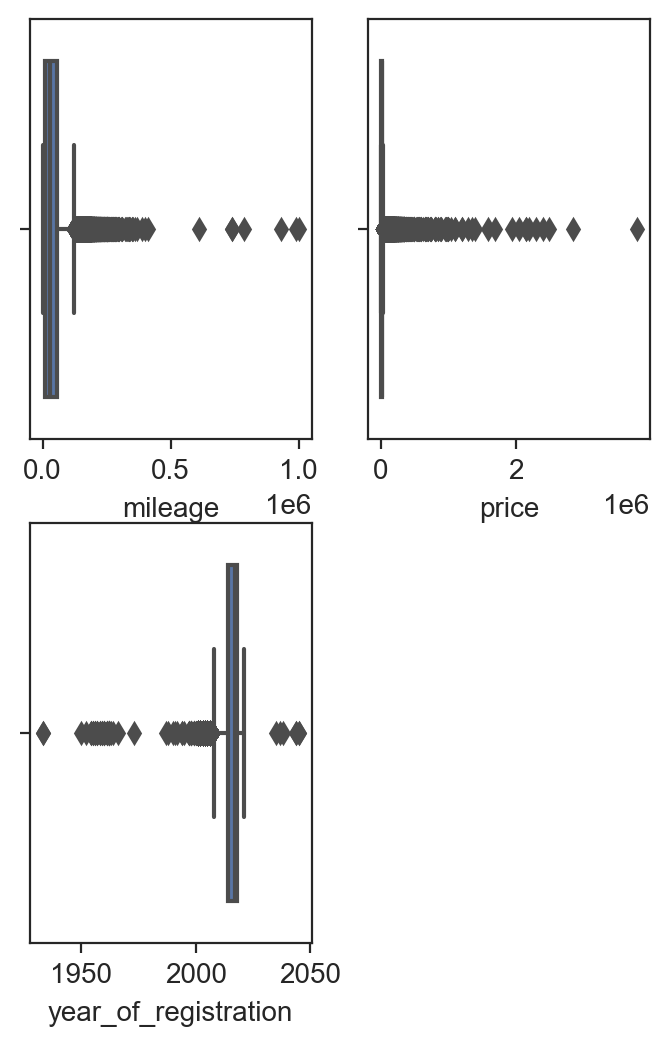

In [24]:
plt.figure(figsize=(4,6))
plt.subplot(2,2,1)
sns.boxplot( x='mileage' ,data= data)
plt.xlabel("mileage")


plt.subplot(2,2,2)
sns.boxplot( x='price' ,data= data)
plt.xlabel("price")


plt.subplot(2,2,3)
sns.boxplot( x='year_of_registration' ,data= data)
plt.xlabel("year_of_registration")
plt.show()

# Outliers

In [25]:
columnss =data[['mileage', 'price','year_of_registration']]
for column in columnss:
        Q1 = data[column].quantile(0.10)
        Q3 = data[column].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [26]:
data.shape

(392390, 10)

In [27]:
print(data.describe())

             mileage  year_of_registration          price
count  392390.000000         392390.000000  392390.000000
mean    37767.554178           2015.563873   15362.819983
std     34057.016839              3.980231   11674.696680
min         0.000000           1995.000000     180.000000
25%     10946.000000           2014.000000    7495.000000
50%     29000.000000           2017.000000   12495.000000
75%     56892.750000           2018.000000   19730.000000
max    217328.000000           2035.000000   73875.000000


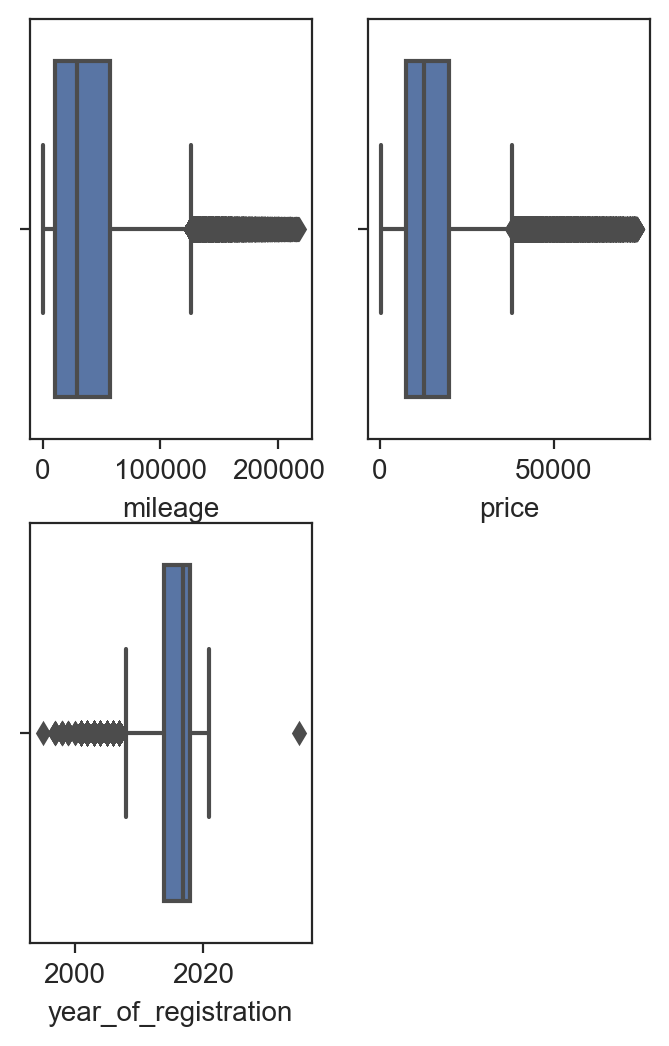

In [30]:
# boxplot after outliers handling
plt.figure(figsize=(4,6))
plt.subplot(2,2,1)
sns.boxplot( x='mileage' ,data= data)
plt.xlabel("mileage")


plt.subplot(2,2,2)
sns.boxplot( x='price' ,data= data)
plt.xlabel("price")


plt.subplot(2,2,3)
sns.boxplot( x='year_of_registration' ,data= data)
plt.xlabel("year_of_registration")
plt.show()

# Encoding

In [31]:
data_ml = data.copy() 
data = data.sort_values(by='price')

In [32]:
categorical_features = data.select_dtypes(include=['object']).columns

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:  
    data[column] = le.fit_transform(data[column])

data['crossover_car_and_van'] = data['crossover_car_and_van'].astype(int)


In [34]:
data['standard_model'].nunique()

906

In [35]:
data.describe()

mileage  standard_colour  standard_make  standard_model  \
count  392390.000000    392390.000000  392390.000000   392390.000000   
mean    37767.554178         9.922824      52.560570      401.499521   
std     34057.016839         7.819563      29.038702      269.878791   
min         0.000000         0.000000       0.000000        0.000000   
25%     10946.000000         2.000000      30.000000      158.000000   
50%     29000.000000         8.000000      56.000000      397.000000   
75%     56892.750000        18.000000      81.000000      606.000000   
max    217328.000000        21.000000      92.000000      905.000000   

       vehicle_condition  year_of_registration          price      body_type  \
count      392390.000000         392390.000000  392390.000000  392390.000000   
mean            0.924471           2015.563873   15362.819983       9.178139   
std             0.264244              3.980231   11674.696680       3.303472   
min             0.000000           1995.000000     180.000000       0.000000   
25%             1.000000           2014.000000    7495.000000       7.000000   
50%             1.000000           2017.000000   12495.000000       7.000000   
75%             1.000000           2018.000000   19730.000000      13.000000   
max             1.000000           2035.000000   73875.000000      15.000000   

       crossover_car_and_van      fuel_type  
count          392390.000000  392390.000000  
mean                0.004200       4.027781  
std                 0.064671       2.511379  
min                 0.000000       0.000000  
25%                 0.000000       1.000000  
50%                 0.000000       6.000000  
75%                 0.000000       6.000000  
max                 1.000000       8.000000

# Visualisation

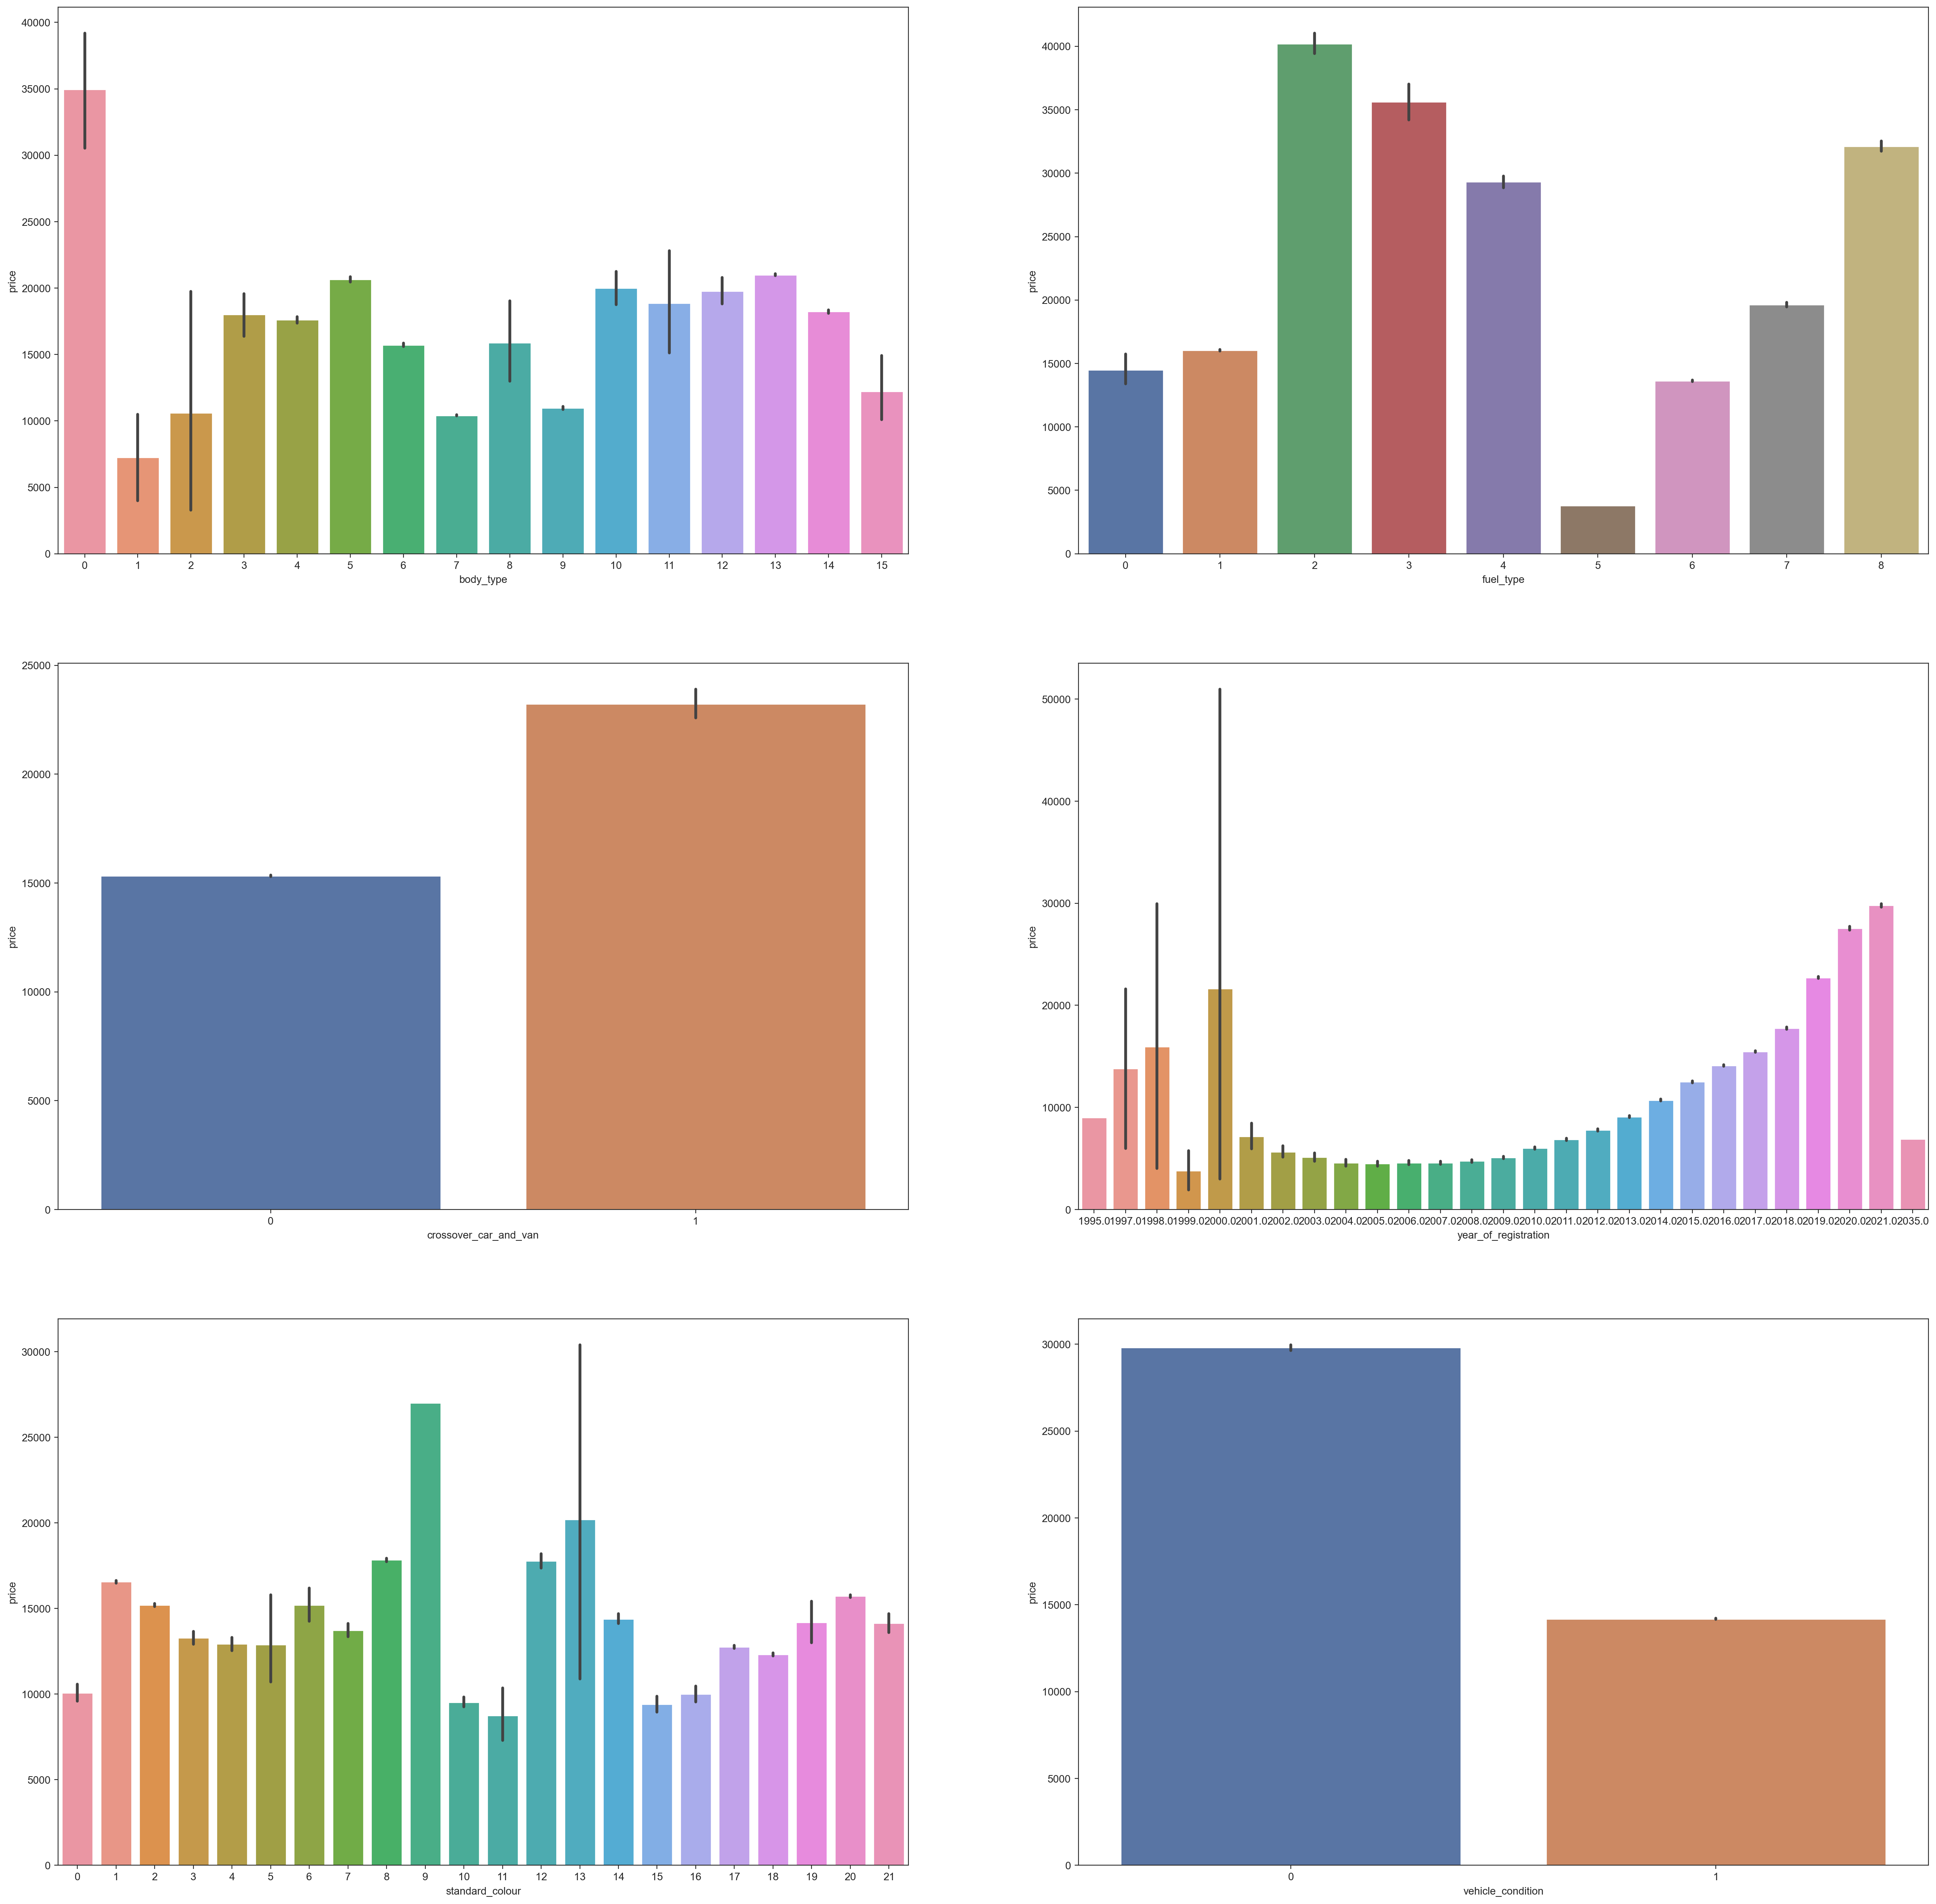

In [36]:
plt.figure(figsize=(32,32))
plt.subplot(3,2,1)
sns.barplot(x='body_type', y='price', data=data)

plt.subplot(3,2,2)
sns.barplot(x='fuel_type', y='price', data=data)

plt.subplot(3,2,3)
sns.barplot(x='crossover_car_and_van', y='price', data=data)

plt.subplot(3,2,4)
sns.barplot(x='year_of_registration', y='price', data=data)

plt.subplot(3,2,5)
sns.barplot(x='standard_colour', y='price', data=data)

plt.subplot(3,2,6)
sns.barplot(x='vehicle_condition', y='price', data=data)
plt.show()

<Axes: xlabel='mileage', ylabel='price'>

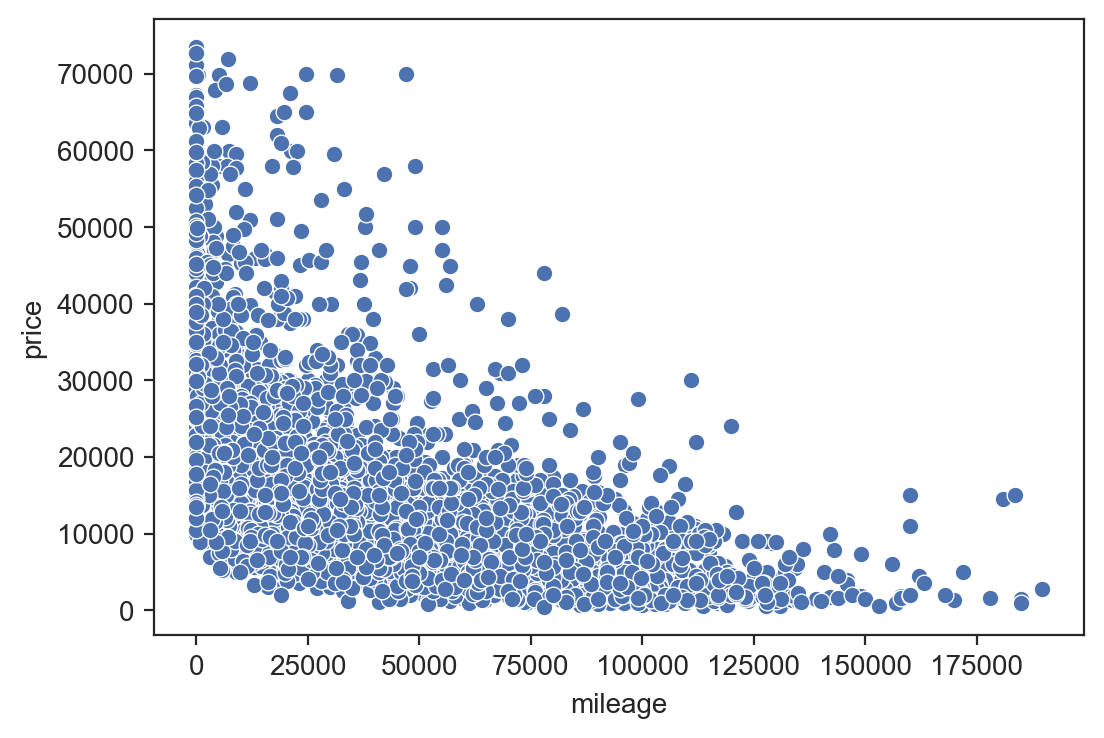

In [37]:
data_sample=data.sample(frac=0.01)
sns.scatterplot(x='mileage', y='price', data=data_sample)

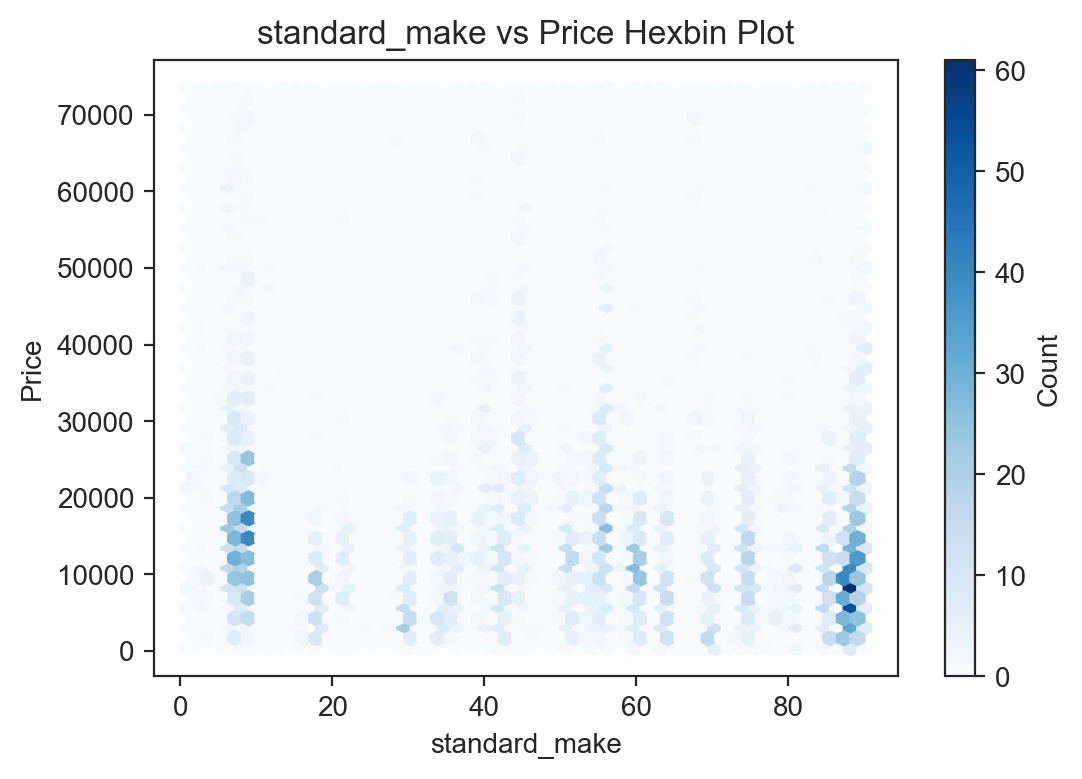

In [38]:
plt.hexbin(data_sample['standard_make'], data_sample['price'], gridsize=50, cmap='Blues')
plt.xlabel('standard_make')
plt.ylabel('Price')
plt.title('standard_make vs Price Hexbin Plot')
plt.colorbar(label='Count')
plt.show()

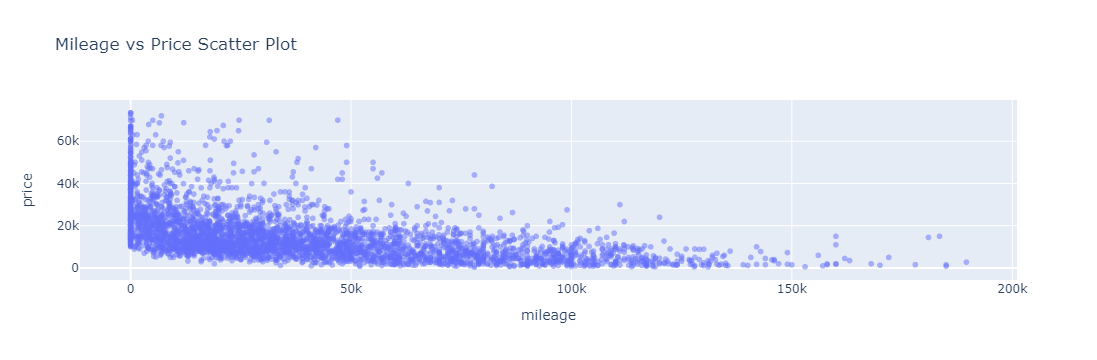

In [39]:
# interactive plot 
import plotly.express as px
fig = px.scatter(data_sample, x='mileage', y='price', opacity=0.5, title='Mileage vs Price Scatter Plot')
fig.show()

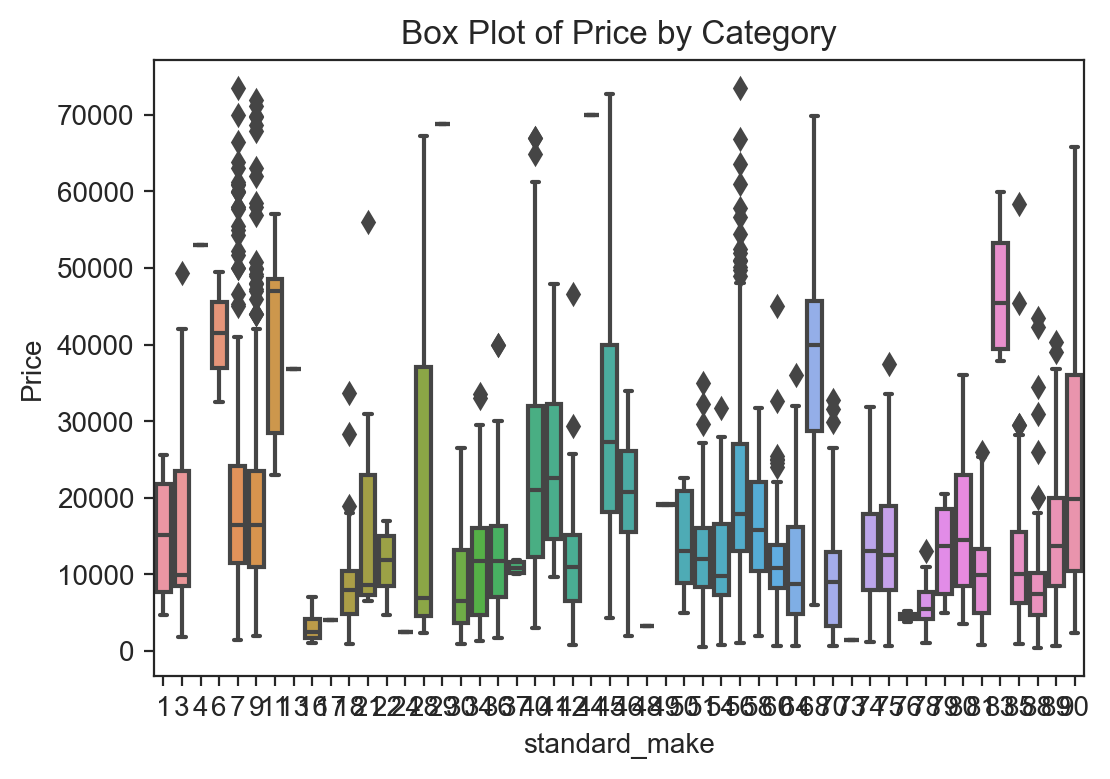

In [40]:
sns.boxplot(x='standard_make', y='price', data=data_sample)
plt.xlabel('standard_make')
plt.ylabel('Price')
plt.title('Box Plot of Price by Category')
plt.show()


<Axes: >

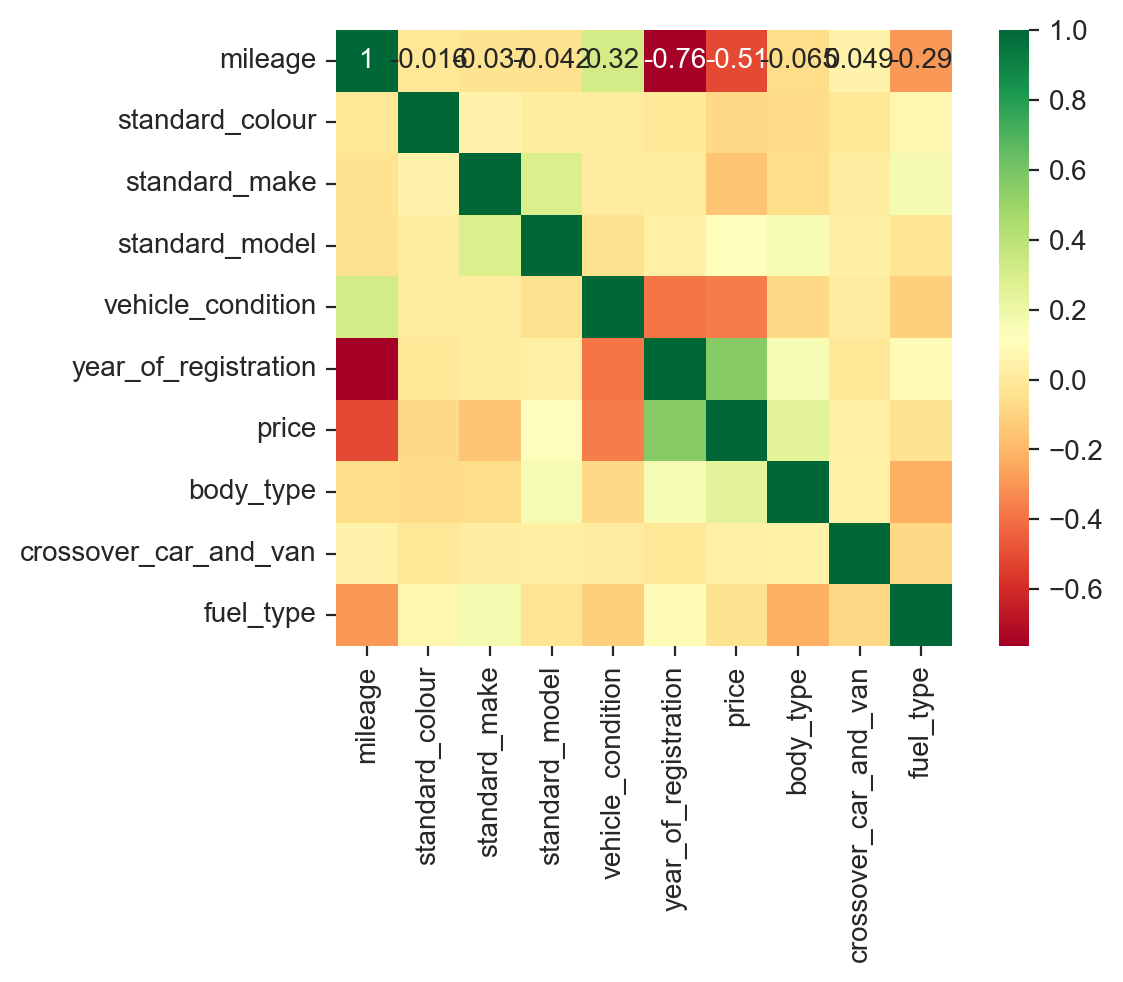

In [41]:
sns.heatmap(data_sample.corr(), square=True, annot=True, cmap='RdYlGn')

In [42]:
correlation_matrix = data.corr()
print(correlation_matrix)

                        mileage  standard_colour  standard_make  \
mileage                1.000000        -0.022080      -0.038560   
standard_colour       -0.022080         1.000000       0.047562   
standard_make         -0.038560         0.047562       1.000000   
standard_model        -0.045137         0.003493       0.262751   
vehicle_condition      0.316929         0.014613       0.003112   
year_of_registration  -0.781246        -0.001701       0.013500   
price                 -0.509857        -0.078880      -0.156678   
body_type             -0.078467        -0.054977      -0.075421   
crossover_car_and_van  0.024397        -0.003693       0.025221   
fuel_type             -0.266391         0.059669       0.147950   

                       standard_model  vehicle_condition  \
mileage                     -0.045137           0.316929   
standard_colour              0.003493           0.014613   
standard_make                0.262751           0.003112   
standard_model        

# Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

scaler_data= StandardScaler()
data_scaled = scaler_data.fit_transform(data)

# Model Building

In [44]:
from sklearn.model_selection import train_test_split

columns = data.columns  
X = pd.DataFrame(data_scaled, columns=columns).drop('price', axis=1)
y = pd.Series(data_scaled[:, columns.get_loc('price')])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

knn_model = KNeighborsRegressor()
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_val)
knn_rmse = mean_squared_error(y_val, knn_predictions, squared=False)
knn_r2 = r2_score(y_val, knn_predictions)
print("KNN RMSE:", knn_rmse)
print("KNN R^2:", knn_r2)

KNN RMSE: 0.364462328479329
KNN R^2: 0.8664430825995229


In [105]:
# Grid search
knn_param_grid = {'n_neighbors': [3, 5, 7] }
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
knn_best_params = knn_grid_search.best_params_
knn_best_model = knn_grid_search.best_estimator_

In [106]:
print("Best Parameters:", knn_best_params)

Best Parameters: {'n_neighbors': 3}


In [77]:
knn_predictions=knn_best_model.predict(X_test)

In [78]:
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
knn_r2 = r2_score(y_test, knn_predictions)
print("RMSE:",knn_rmse)
print("R2 score:", knn_r2)

RMSE: 0.3600795913147708
R2 score: 0.871077407455104


In [79]:
#cross validation 
knn_cv_scores = cross_val_score(knn_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
knn_cv_rmse = np.sqrt(-knn_cv_scores.mean())

print(f"K-Nearest Neighbors CV RMSE: {knn_cv_rmse}")
print(np.sqrt(-knn_cv_scores))

K-Nearest Neighbors CV RMSE: 0.3746338288450649
[0.37446151 0.37532044 0.37760876 0.37589768 0.36983542]


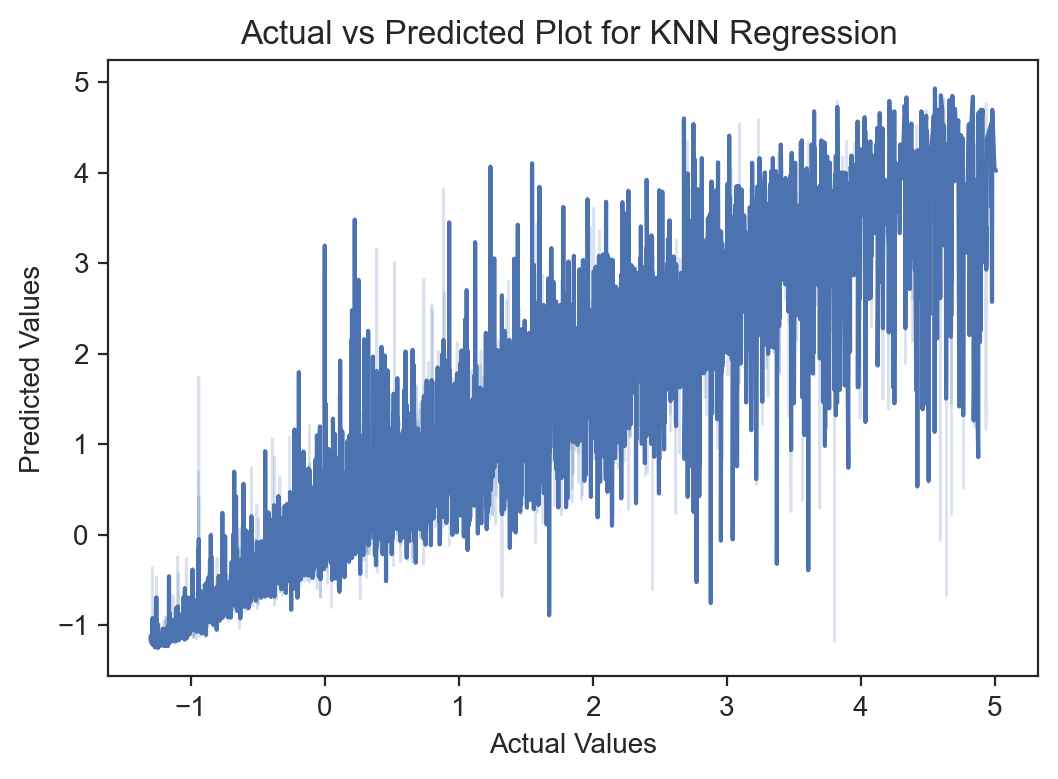

In [135]:
# line plot for actual vs predicted
sns.lineplot(x=y_test, y=knn_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Plot for KNN Regression ")
plt.show()

# Decision tree

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
tree_predictions = dt_model.predict(X_val)
tree_rmse = mean_squared_error(y_val, tree_predictions, squared=False)
tree_r2 = r2_score(y_val, tree_predictions)
print("\nDecision Tree RMSE:", tree_rmse)
print("Decision Tree R^2:", tree_r2) 



Decision Tree RMSE: 0.30189756744094903
Decision Tree R^2: 0.908361003859752


In [81]:
# grid search
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_

In [98]:
print("Best Parameters:", dt_best_params)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10}


In [82]:
dt_predictions=dt_best_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_r2 = r2_score(y_test, dt_predictions)
print("RMSE:",dt_rmse)
print("R2 score:", dt_r2)

RMSE: 0.2596728872865562
R2 score: 0.9329520922682075


In [83]:
#cross validation
dt_cv_scores = cross_val_score(dt_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dt_cv_scores= np.sqrt(-dt_cv_scores)
dt_cv_rmse = dt_cv_scores.mean()
print(dt_cv_scores)
print(f"Decision Tree CV RMSE: {dt_cv_rmse}")

[0.26727604 0.2701457  0.27146797 0.27173104 0.26528536]
Decision Tree CV RMSE: 0.26918122184307725


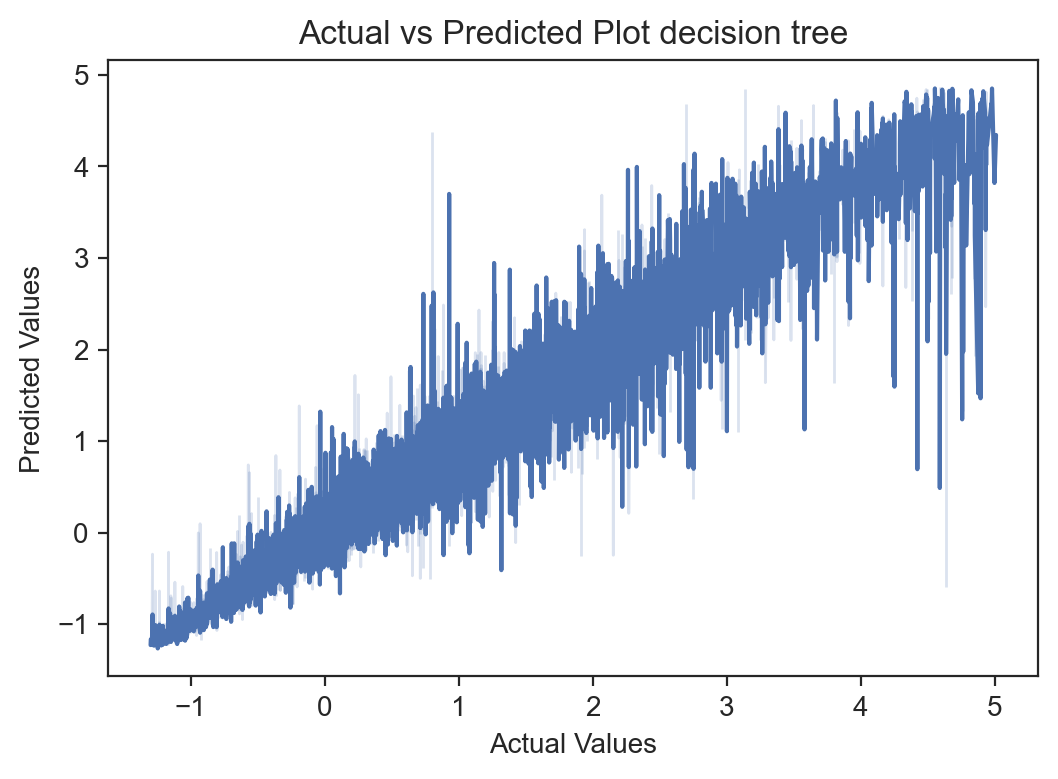

In [136]:
# line plot for actual vs predicted
sns.lineplot(x=y_test, y=dt_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Plot decision tree")
plt.show()

# Linear regression

In [96]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X_train,y_train)
lr_predictions=linear_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)
print("RMSE:",lr_rmse)
print("R2 score:", lr_r2)


RMSE: 0.759756804400188
R2 score: 0.4260405471522052


In [93]:
# Perform cross-validation
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = np.sqrt(-cv_scores)
cv_rmse_scores = cv_scores.mean()
print(cv_scores)
print(cv_rmse_scores)

[0.75148856 0.75449476 0.75372919 0.76119868 0.75440698]
0.7550636332933518


In [94]:
#NO grid search for Linear regression
linear_model.fit(X_train,y_train)
lr_predictions=linear_model.predict(X_test)

In [95]:
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, dt_predictions)
print("RMSE:",dt_rmse)
print("R2 score:", dt_r2)

RMSE: 0.2596728872865562
R2 score: 0.9329520922682075


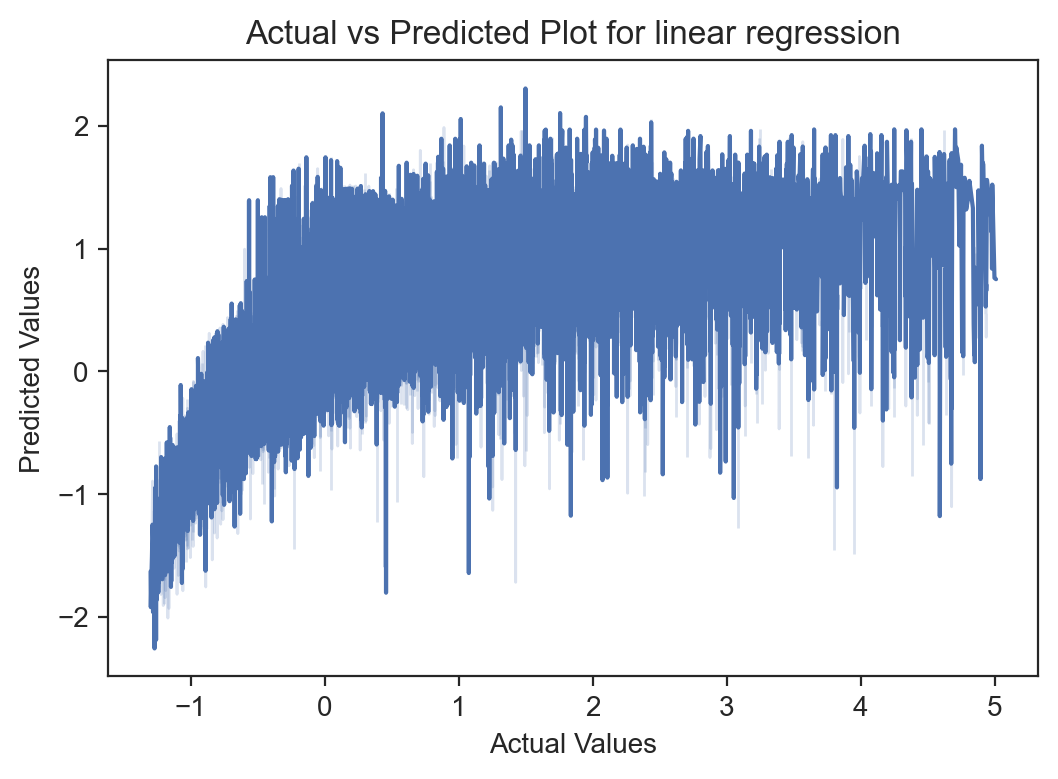

In [137]:
sns.lineplot(x=y_test, y=lr_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Plot for linear regression")
plt.show()

# Feature importance

### Linear model

In [112]:
# Retrieve coefficients and corresponding feature names
coefficients = linear_model.coef_[0]  # Extract the 1-dimensional array
feature_names_scaled = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame to organize coefficients and feature names
coefficients_df = pd.DataFrame({'Coefficient_linear': coefficients}, index=feature_names_scaled)

# Sort the DataFrame by absolute values of coefficients in descending order
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print or visualize the coefficients
print(coefficients_df)

                       Coefficient
mileage                  -0.261954
standard_colour          -0.261954
standard_make            -0.261954
standard_model           -0.261954
vehicle_condition        -0.261954
year_of_registration     -0.261954
body_type                -0.261954
crossover_car_and_van    -0.261954
fuel_type                -0.261954


### Decision Tree

In [151]:
coefficients =  dt_best_model.feature_importances_ 
feature_names_scaled = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

coefficients_df = pd.DataFrame({'Coefficient_': coefficients}, index=feature_names_scaled)

# Fix the KeyError by using the correct column name 'Coefficient_'
coefficients_df_dt = coefficients_df.reindex(coefficients_df['Coefficient_'].abs().sort_values(ascending=False).index)

# Print or visualize the coefficients
print(coefficients_df_dt)

                       Coefficient_
year_of_registration       0.398114
standard_model             0.195574
standard_make              0.157595
body_type                  0.146442
fuel_type                  0.052564
mileage                    0.040104
standard_colour            0.004109
vehicle_condition          0.003622
crossover_car_and_van      0.001875


## KNN

In [111]:
feature_importance_knn = result.importances_mean
coefficients_df = pd.DataFrame({'Coefficient': feature_importance_knn}, index=feature_names_scaled)


coefficients_df_knn = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print or visualize the coefficients
print(coefficients_df)
print("Feature Importance for KNN Regression:", feature_importance_knn)

                       Coefficient
standard_make             0.577493
standard_model            0.469372
body_type                 0.464113
year_of_registration      0.339953
mileage                   0.212086
fuel_type                 0.198690
vehicle_condition         0.163050
standard_colour           0.027552
crossover_car_and_van     0.011533
Feature Importance for KNN Regression: [0.2120856  0.02755219 0.57749343 0.46937185 0.16304982 0.33995304
 0.46411273 0.01153268 0.19868956]


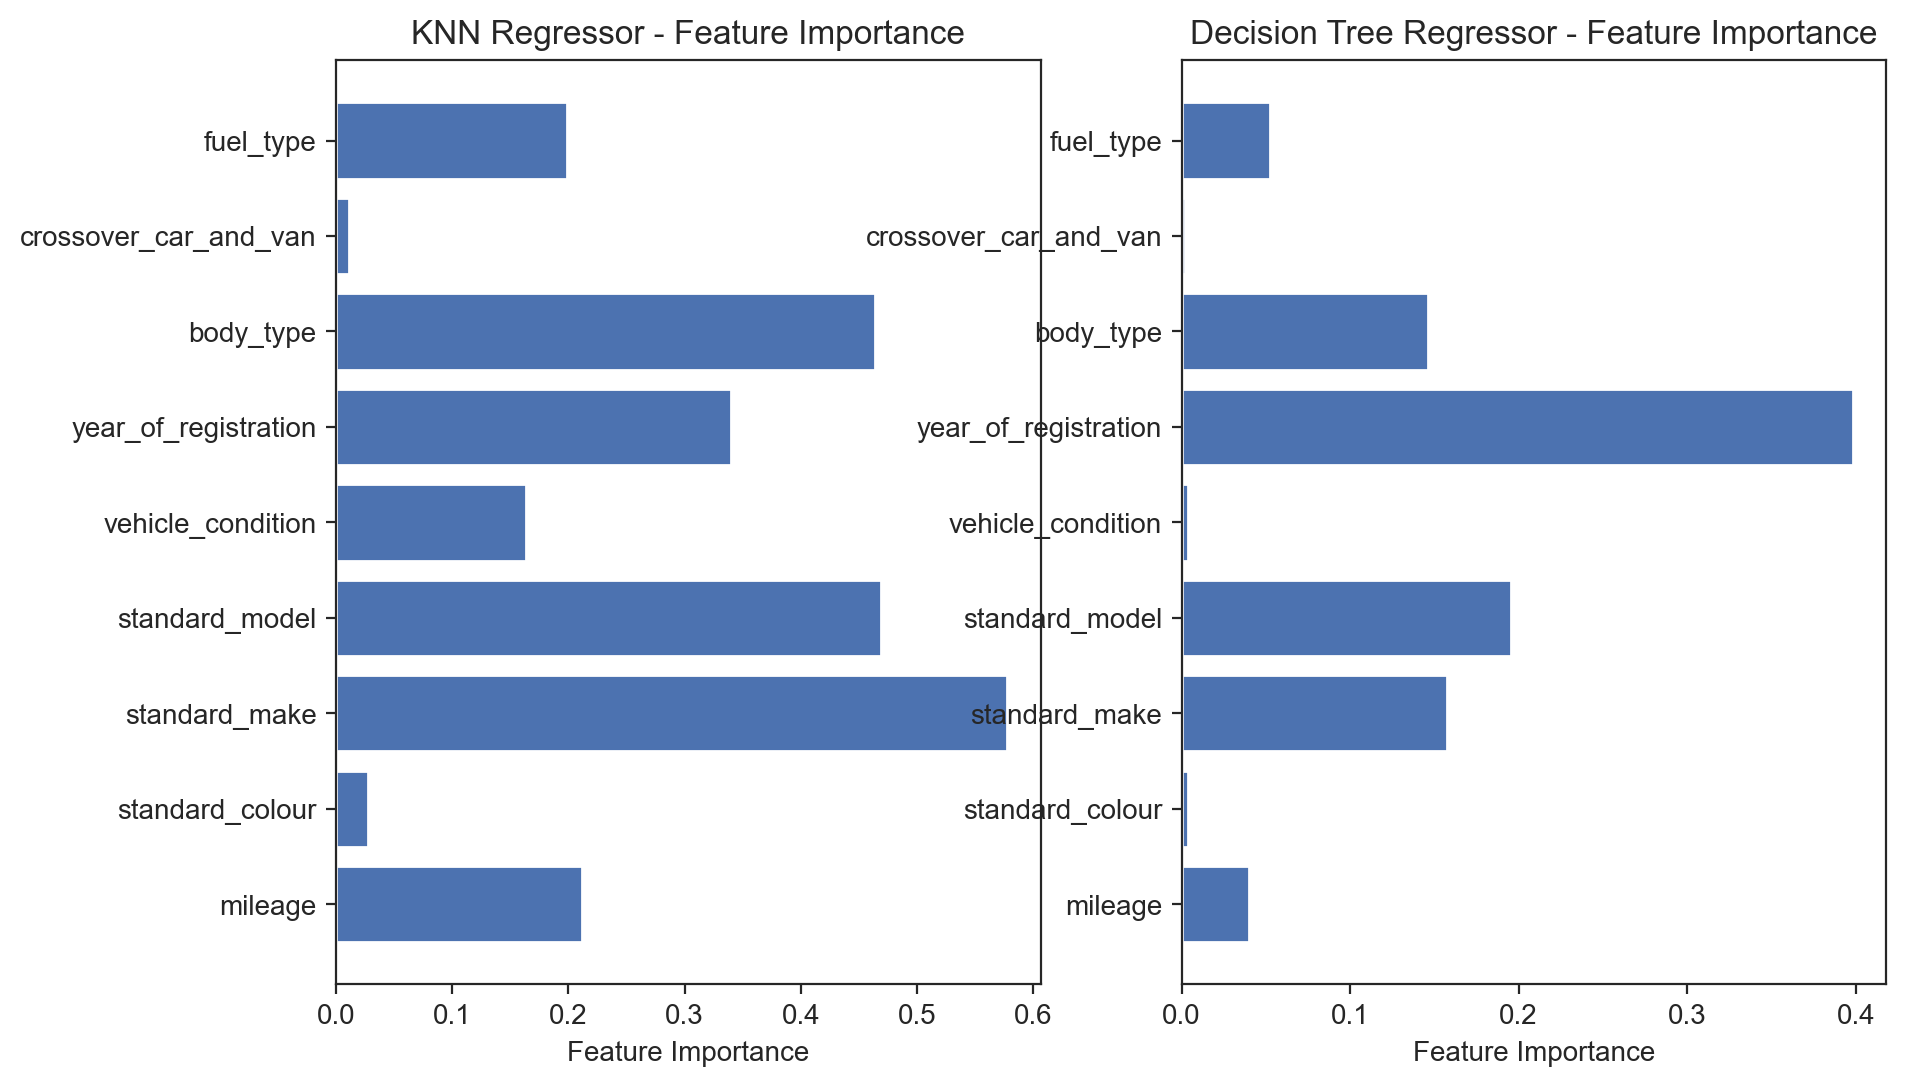

In [155]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

plt.barh(range(len(feature_importance_knn)), feature_importance_knn, align='center')
plt.yticks(range(len(feature_importance_knn)), feature_names_scaled)
plt.xlabel('Feature Importance')
plt.title('KNN Regressor - Feature Importance')

plt.subplot(1,2,2)

plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), feature_names_scaled)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Regressor - Feature Importance')
plt.show()

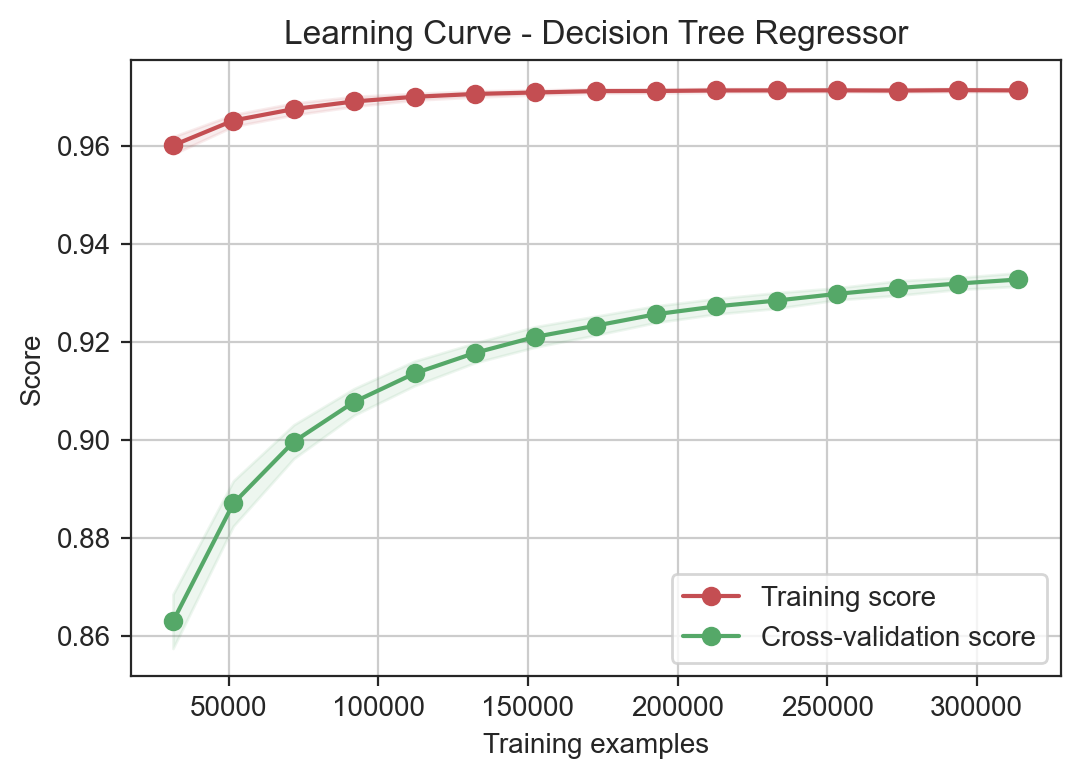

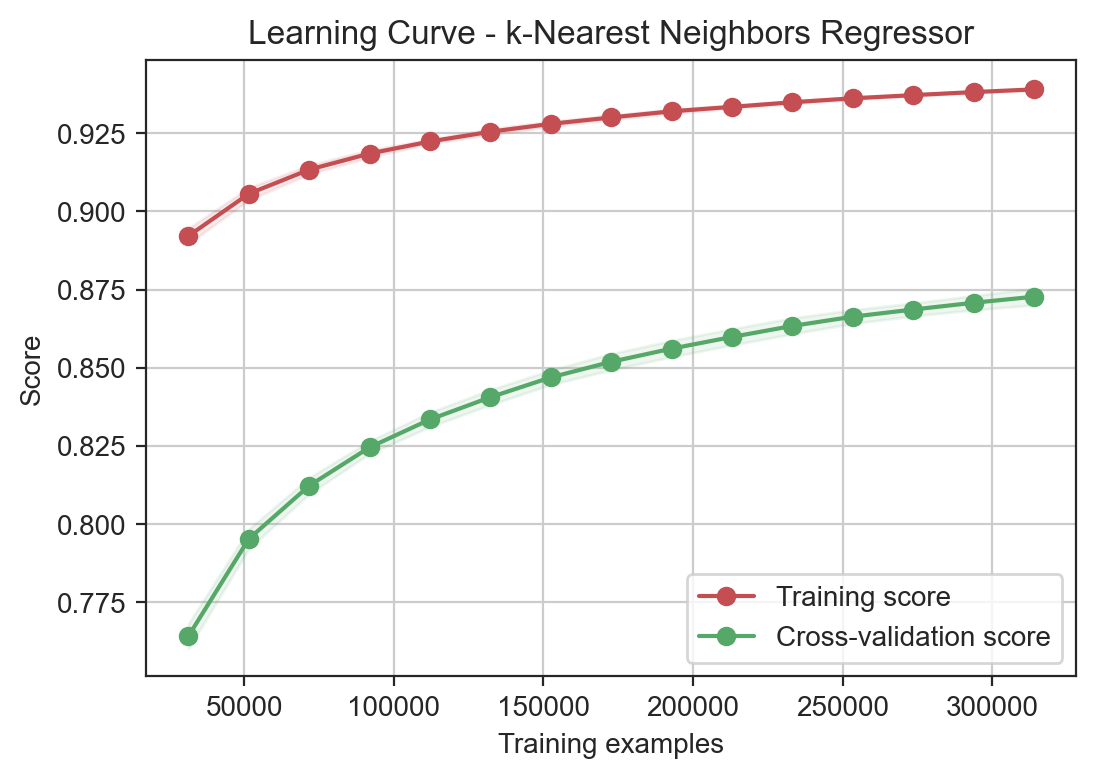

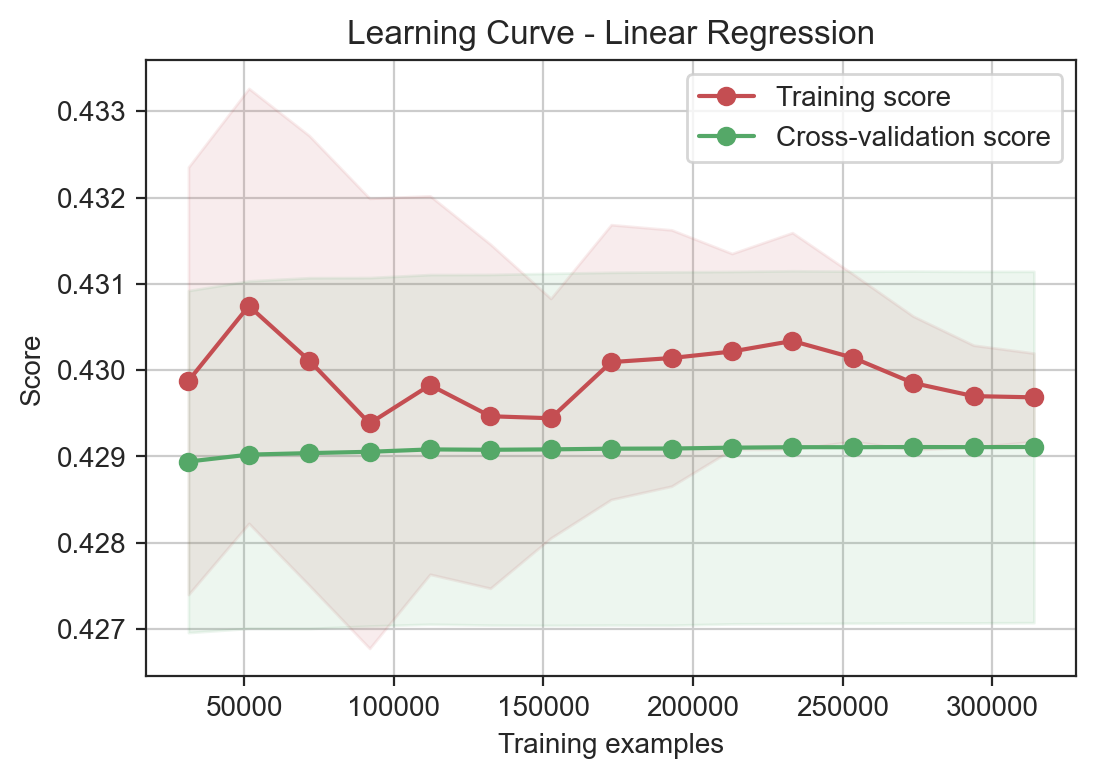

In [113]:
# Import necessary libraries

from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 15)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



# Decision Tree Regressor
title = "Learning Curve - Decision Tree Regressor"

plot_learning_curve(dt_best_model, title, X, y, cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0))
plt.show()

# k-Nearest Neighbors Regressor
title = "Learning Curve - k-Nearest Neighbors Regressor"

plot_learning_curve(knn_best_model, title, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0))
plt.show()

# Linear Regression
title = "Learning Curve - Linear Regression"

plot_learning_curve(linear_model, title, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0))
plt.show()


Text(0.5, 1.0, 'Residual Plot for Linear Regression Model')

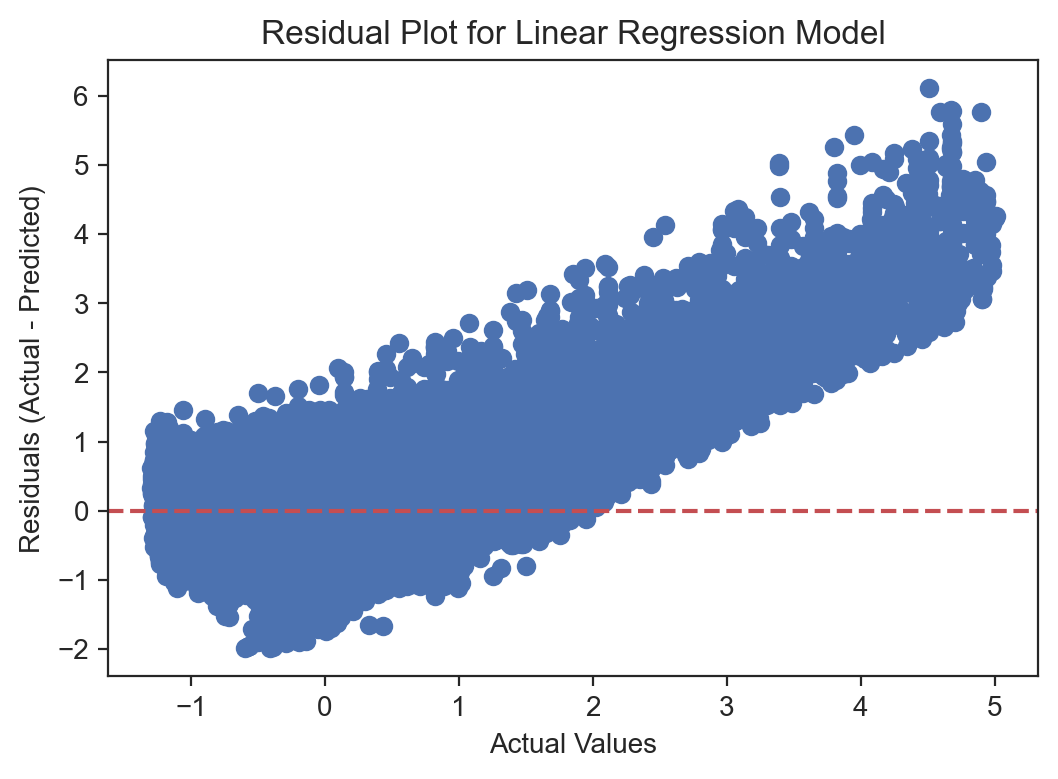

In [139]:
y_pred_lr = linear_model.predict(X_test)
# Calculate residuals
residuals = y_test - y_pred_lr
# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Linear Regression Model")

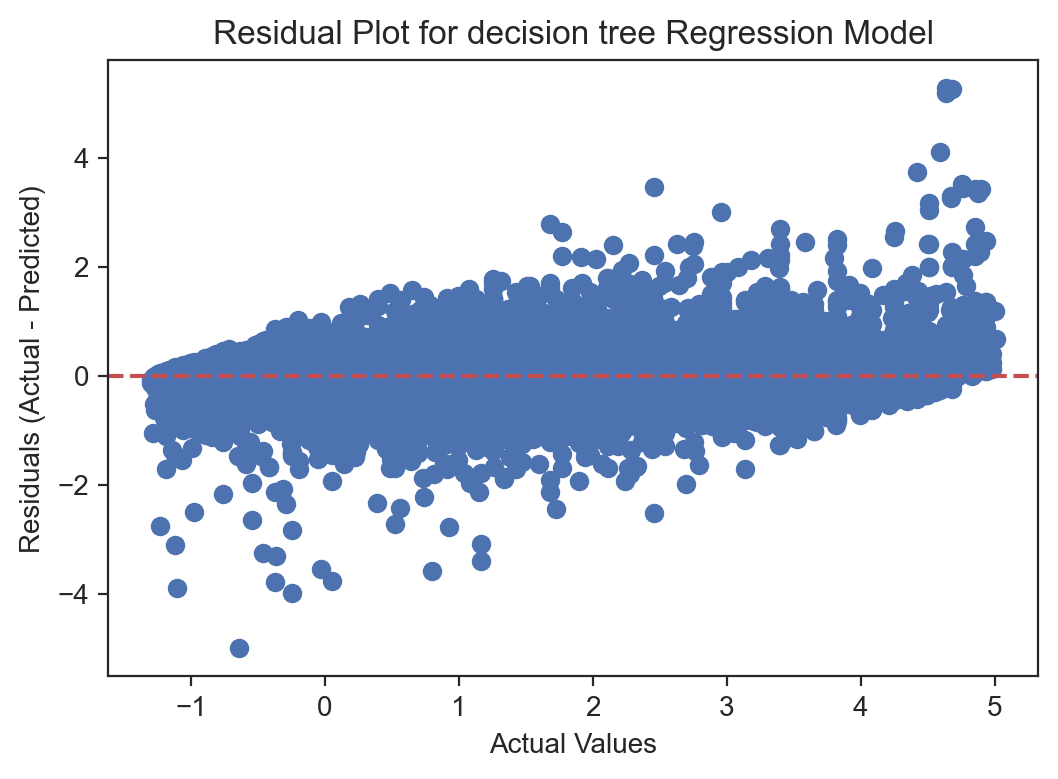

In [125]:
y_pred = dt_best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for decision tree Regression Model")
plt.show()

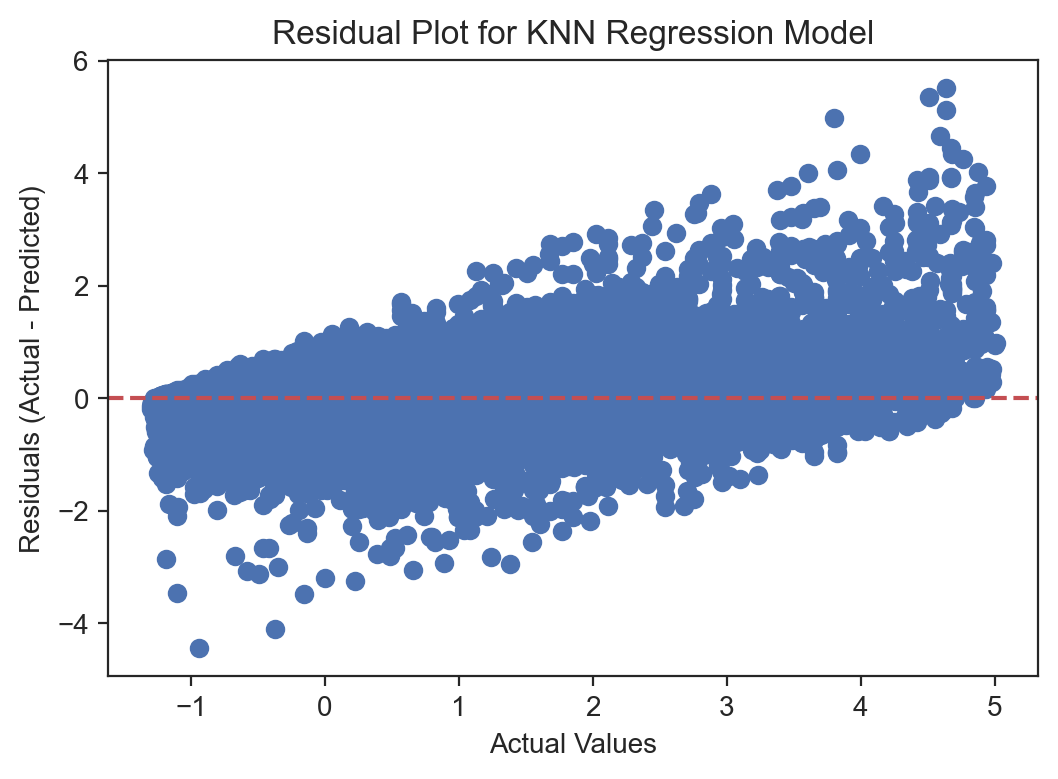

In [126]:
y_pred = knn_best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Visualize residual plot
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for KNN Regression Model")
plt.show()